In [23]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Fashion_Retail_Sales.csv')

In [24]:
import sqlite3

conn = sqlite3.connect(':memory:')

df.to_sql('fashion' , conn, index=False, if_exists= 'replace')

3400

In [25]:
print(df.head())

   Customer Reference ID Item Purchased  Purchase Amount (USD) Date Purchase  \
0                   4018        Handbag                 4619.0    05-02-2023   
1                   4115          Tunic                 2456.0    11-07-2023   
2                   4019       Tank Top                 2102.0    23-03-2023   
3                   4097       Leggings                 3126.0    15-03-2023   
4                   3997         Wallet                 3003.0    27-11-2022   

   Review Rating Payment Method  
0            NaN    Credit Card  
1            2.0    Credit Card  
2            4.1           Cash  
3            3.2           Cash  
4            4.7           Cash  


In [26]:
print(df.isnull().sum())

Customer Reference ID      0
Item Purchased             0
Purchase Amount (USD)    650
Date Purchase              0
Review Rating            324
Payment Method             0
dtype: int64


In [27]:
df['Review Rating'].fillna(0.0, inplace=True)


/var/folders/47/52n8nvf136x7f4rtd97135vh0000gn/T/ipykernel_18305/1074517800.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Review Rating'].fillna(0.0, inplace=True)


In [28]:
df['Purchase Amount (USD)'].fillna(0.0, inplace=True)

/var/folders/47/52n8nvf136x7f4rtd97135vh0000gn/T/ipykernel_18305/377730296.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Purchase Amount (USD)'].fillna(0.0, inplace=True)


In [29]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Reference ID  3400 non-null   int64  
 1   Item Purchased         3400 non-null   object 
 2   Purchase Amount (USD)  3400 non-null   float64
 3   Date Purchase          3400 non-null   object 
 4   Review Rating          3400 non-null   float64
 5   Payment Method         3400 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 159.5+ KB
None


In [30]:
print(df.describe())

       Customer Reference ID  Purchase Amount (USD)  Review Rating
count            3400.000000            3400.000000    3400.000000
mean             4039.660588             126.750588       2.713265
std                48.122583             382.296245       1.409138
min              3957.000000               0.000000       0.000000
25%              3997.000000              24.750000       1.700000
50%              4040.000000              86.000000       2.800000
75%              4081.000000             146.000000       3.900000
max              4122.000000            4932.000000       5.000000


In [31]:
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [34]:
# Check the exact column names
print(df.columns.tolist())


['Customer_Reference_ID', 'Item_Purchased', 'Purchase_Amount_USD', 'Date_Purchase', 'Review_Rating', 'Payment_Method']


In [35]:
# Clean column names for SQL compatibility
df.columns = [col.strip().lower().replace(' ', '_').replace('(', '').replace(')', '') for col in df.columns]

# Print new column names
print(df.columns.tolist())


['customer_reference_id', 'item_purchased', 'purchase_amount_usd', 'date_purchase', 'review_rating', 'payment_method']


In [36]:
# Create a fresh SQLite database
conn = sqlite3.connect(':memory:')

# Load cleaned DataFrame into SQL
df.to_sql('purchases', conn, index=False, if_exists='replace')


3400

In [38]:
# Total Revenue 

In [37]:
pd.read_sql("SELECT SUM(purchase_amount_usd) AS total_revenue FROM purchases", conn)


,total_revenue
0,430952.0


In [39]:
# Average Review Rating

In [40]:
pd.read_sql("SELECT AVG(review_rating) AS avg_rating FROM purchases", conn)


,avg_rating
0,2.713265


In [41]:
# Most popular Item

In [43]:
query = """
SELECT item_purchased, COUNT(*) AS times_purchased
FROM purchases
GROUP BY item_purchased
ORDER BY times_purchased DESC
"""

# Fetch results into a DataFrame
popular_items = pd.read_sql(query, conn)
print(popular_items)


   item_purchased  times_purchased
0            Belt               90
1           Skirt               88
2          Shorts               87
3           Pants               86
4        Tank Top               82
5         T-shirt               82
6         Pajamas               81
7         Loafers               76
8        Camisole               76
9          Hoodie               75
10         Wallet               73
11          Socks               73
12         Poncho               73
13         Kimono               73
14         Blouse               73
15        Handbag               72
16       Cardigan               72
17           Vest               71
18       Sneakers               71
19         Onesie               71
20         Blazer               71
21       Backpack               71
22       Umbrella               70
23       Raincoat               69
24    Trench Coat               68
25            Hat               68
26     Sunglasses               67
27           Coat   

/var/folders/47/52n8nvf136x7f4rtd97135vh0000gn/T/ipykernel_18305/4136164083.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=popular_items, x='item_purchased', y='times_purchased', palette='viridis')


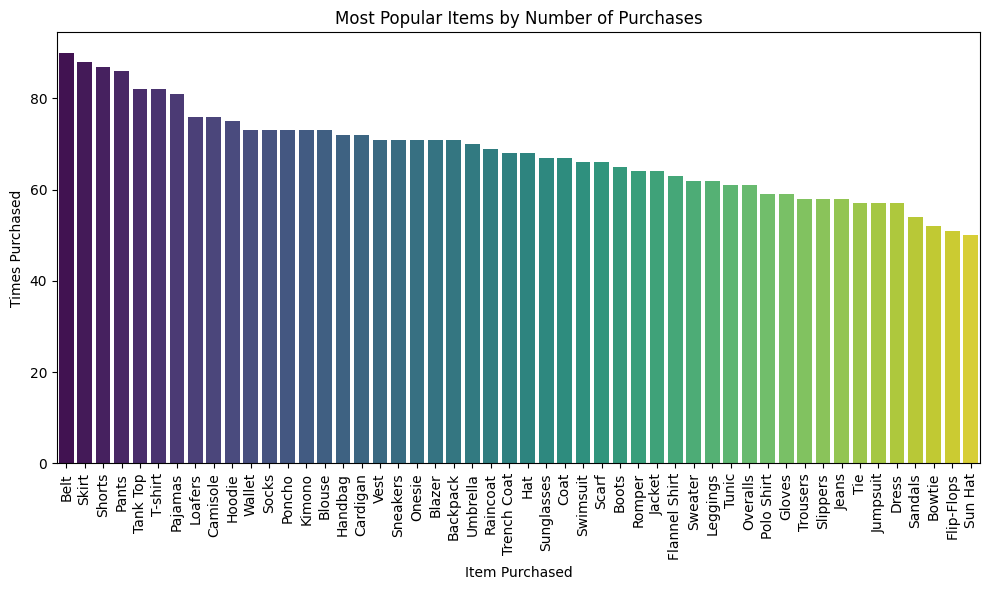

In [47]:
plt.figure(figsize=(10,6))
sns.barplot(data=popular_items, x='item_purchased', y='times_purchased', palette='viridis')
plt.title('Most Popular Items by Number of Purchases')
plt.xlabel('Item Purchased')
plt.ylabel('Times Purchased')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [50]:
query = """
SELECT payment_method, SUM(purchase_amount_usd) AS total_sales
FROM purchases
GROUP BY payment_method
"""

# Fetch results into a DataFrame
sales_by_payment = pd.read_sql(query, conn)
print(sales_by_payment)

  payment_method  total_sales
0           Cash     200338.0
1    Credit Card     230614.0


/var/folders/47/52n8nvf136x7f4rtd97135vh0000gn/T/ipykernel_18305/891718868.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_payment, x='payment_method', y='total_sales', palette='Set2')


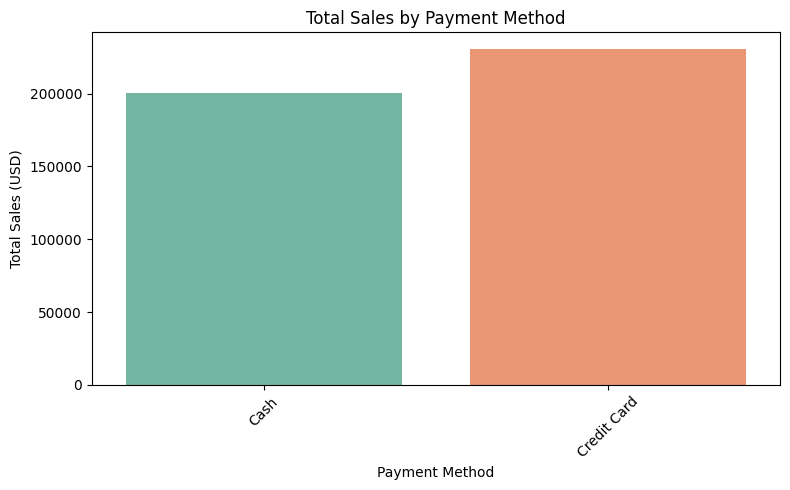

In [51]:
plt.figure(figsize=(8, 5))
sns.barplot(data=sales_by_payment, x='payment_method', y='total_sales', palette='Set2')
plt.title('Total Sales by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [53]:
#Review Ratings Distribution (Histogram)

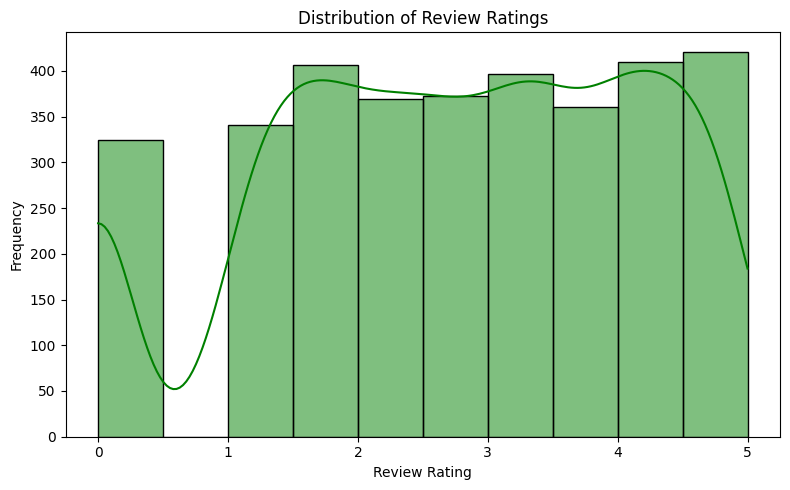

In [52]:
# Plotting the distribution of review ratings
plt.figure(figsize=(8, 5))
sns.histplot(df['review_rating'], bins=10, kde=True, color='g')
plt.title('Distribution of Review Ratings')
plt.xlabel('Review Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [54]:
query = """
SELECT item_purchased, AVG(review_rating) AS avg_rating
FROM purchases
GROUP BY item_purchased
ORDER BY avg_rating DESC
"""

# Fetch results into a DataFrame
avg_rating_items = pd.read_sql(query, conn)
print(avg_rating_items)

   item_purchased  avg_rating
0         Sun Hat    3.144000
1     Trench Coat    3.072059
2      Flip-Flops    3.043137
3         Sandals    3.020370
4            Coat    3.008955
5           Scarf    2.960606
6        Umbrella    2.951429
7           Skirt    2.942045
8          Wallet    2.926027
9           Jeans    2.925862
10       Swimsuit    2.904545
11          Boots    2.876923
12       Tank Top    2.873171
13       Cardigan    2.869444
14          Dress    2.859649
15       Backpack    2.847887
16         Gloves    2.830508
17           Belt    2.801111
18         Blazer    2.791549
19        Handbag    2.773611
20       Trousers    2.770690
21       Jumpsuit    2.752632
22         Hoodie    2.744000
23        T-shirt    2.743902
24         Shorts    2.710345
25         Onesie    2.704225
26       Sneakers    2.680282
27         Kimono    2.679452
28         Poncho    2.669863
29        Sweater    2.669355
30     Polo Shirt    2.661017
31       Slippers    2.660345
32        

/var/folders/47/52n8nvf136x7f4rtd97135vh0000gn/T/ipykernel_18305/546331644.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_rating_items, x='item_purchased', y='avg_rating', palette='Blues')


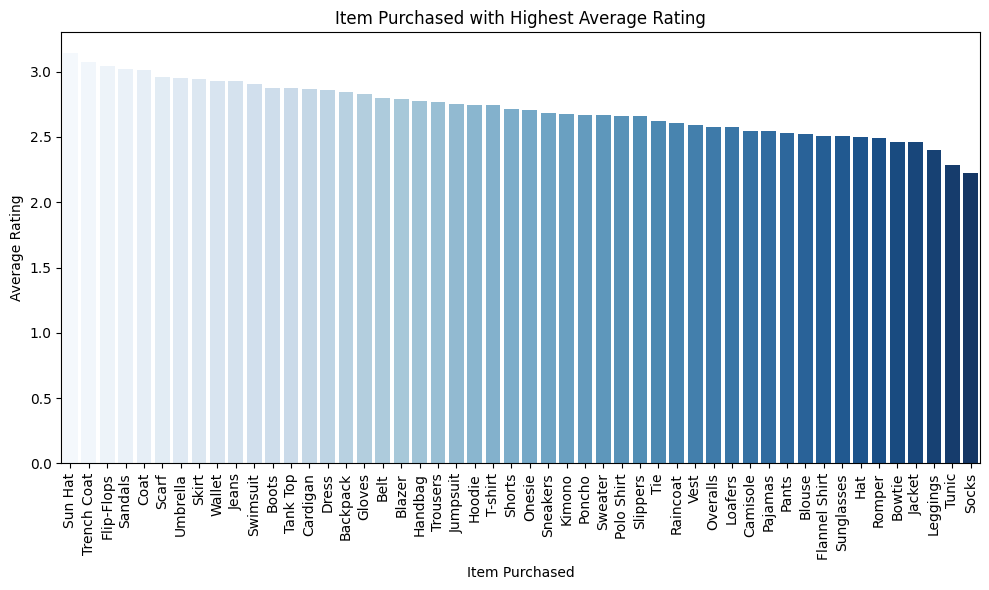

In [56]:
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_rating_items, x='item_purchased', y='avg_rating', palette='Blues')
plt.title('Item Purchased with Highest Average Rating')
plt.xlabel('Item Purchased')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [57]:
#Most Frequent Review Ratings (Frequency Table)

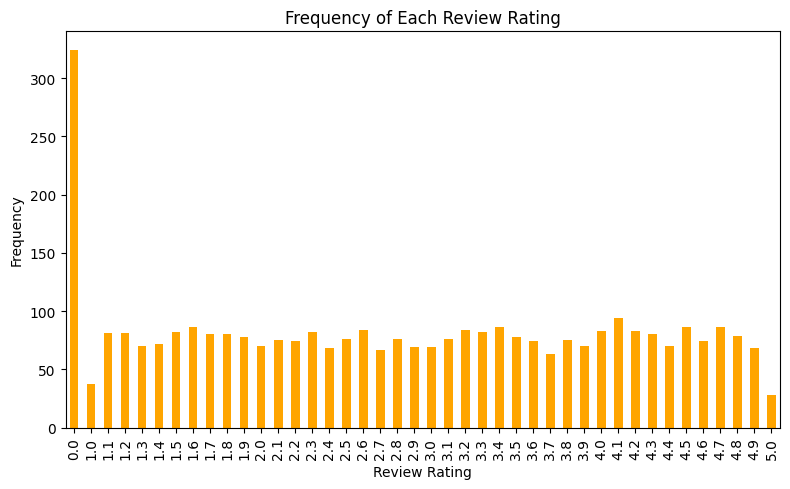

In [59]:
# Frequency of each review rating
review_rating_counts = df['review_rating'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(8, 5))
review_rating_counts.plot(kind='bar', color='orange')
plt.title('Frequency of Each Review Rating')
plt.xlabel('Review Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [60]:
#Correlation Between Purchase Amount and Review Rating

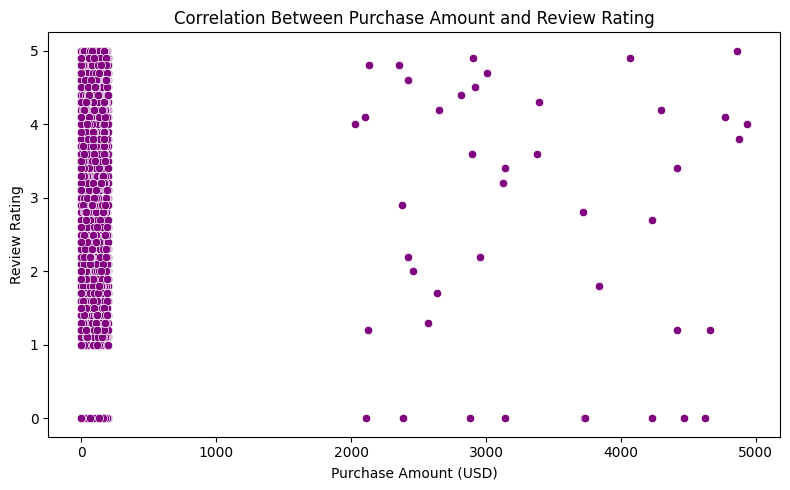

In [61]:
# Plotting the correlation between purchase amount and review rating
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='purchase_amount_usd', y='review_rating', color='purple')
plt.title('Correlation Between Purchase Amount and Review Rating')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Review Rating')
plt.tight_layout()
plt.show()


In [62]:
#Top 3 Items with Most Revenue

In [63]:
query = """
SELECT item_purchased, SUM(purchase_amount_usd) AS total_sales
FROM purchases
GROUP BY item_purchased
ORDER BY total_sales DESC
LIMIT 3
"""

# Fetch results into a DataFrame
top_items_revenue = pd.read_sql(query, conn)
print(top_items_revenue)

  item_purchased  total_sales
0          Tunic      17275.0
1          Jeans      13068.0
2        Pajamas      12798.0


/var/folders/47/52n8nvf136x7f4rtd97135vh0000gn/T/ipykernel_18305/3126238648.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_items_revenue, x='item_purchased', y='total_sales', palette='Reds')


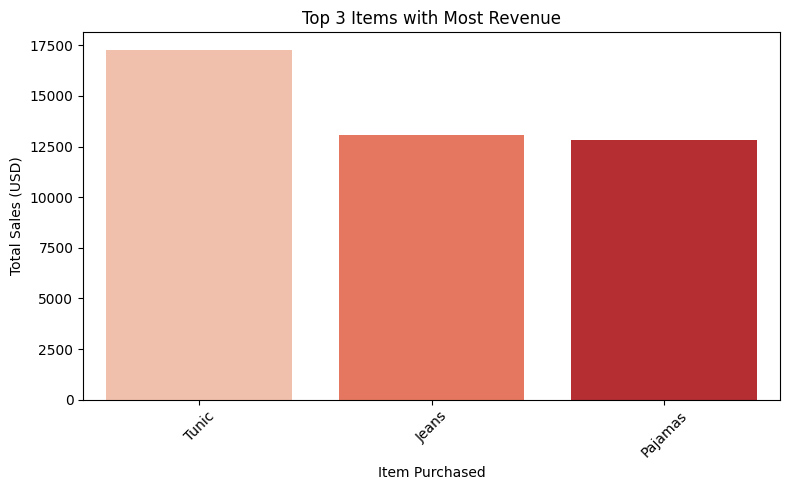

In [64]:
plt.figure(figsize=(8, 5))
sns.barplot(data=top_items_revenue, x='item_purchased', y='total_sales', palette='Reds')
plt.title('Top 3 Items with Most Revenue')
plt.xlabel('Item Purchased')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [65]:
#Customer Segmentation by Total Spend

In [66]:
query = """
SELECT customer_reference_id, SUM(purchase_amount_usd) AS total_spent
FROM purchases
GROUP BY customer_reference_id
"""

customer_spending = pd.read_sql(query, conn)
print(customer_spending)


     customer_reference_id  total_spent
0                     3957       1150.0
1                     3958       1334.0
2                     3959       2047.0
3                     3960       1434.0
4                     3961       1811.0
..                     ...          ...
161                   4118       1899.0
162                   4119       1357.0
163                   4120       2081.0
164                   4121       2035.0
165                   4122       5652.0

[166 rows x 2 columns]


In [67]:
# Segment customers into high, medium, and low spenders
bins = [0, 1000, 5000, float('inf')]
labels = ['Low Spender', 'Medium Spender', 'High Spender']
customer_spending['spending_category'] = pd.cut(customer_spending['total_spent'], bins=bins, labels=labels)


/var/folders/47/52n8nvf136x7f4rtd97135vh0000gn/T/ipykernel_18305/4161245076.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customer_spending, x='spending_category', palette='pastel')


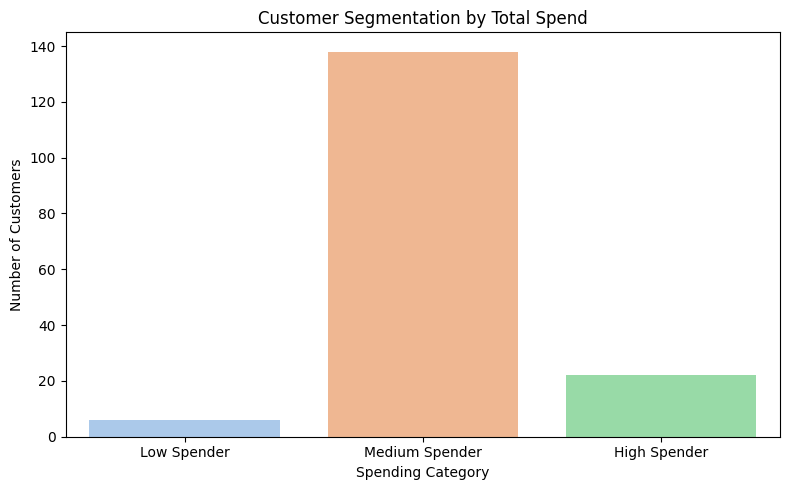

In [68]:
plt.figure(figsize=(8, 5))
sns.countplot(data=customer_spending, x='spending_category', palette='pastel')
plt.title('Customer Segmentation by Total Spend')
plt.xlabel('Spending Category')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

In [69]:
#Purchase Frequency by Customer

In [71]:
query = """
SELECT customer_reference_id, COUNT(*) AS purchase_count
FROM purchases
GROUP BY customer_reference_id
"""

customer_purchases = pd.read_sql(query, conn)
print(customer_purchases)

     customer_reference_id  purchase_count
0                     3957              14
1                     3958              20
2                     3959              22
3                     3960              18
4                     3961              22
..                     ...             ...
161                   4118              22
162                   4119              16
163                   4120              19
164                   4121              18
165                   4122              32

[166 rows x 2 columns]


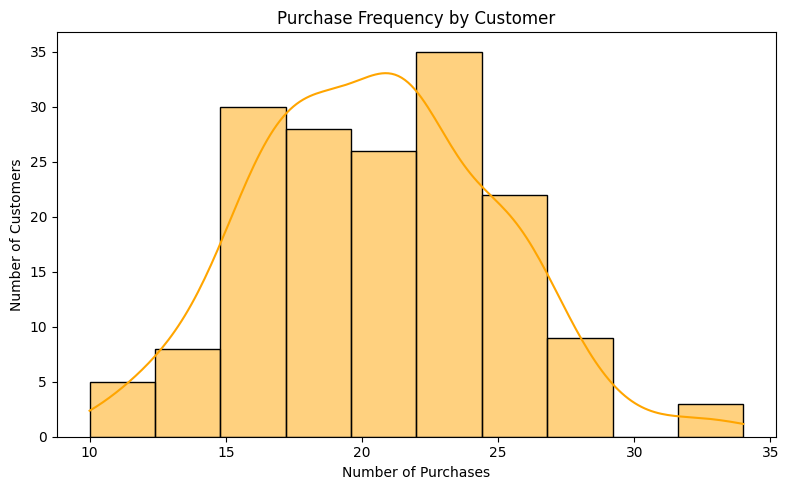

In [72]:
plt.figure(figsize=(8, 5))
sns.histplot(customer_purchases['purchase_count'], bins=10, kde=True, color='orange')
plt.title('Purchase Frequency by Customer')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

In [78]:
#Most Expensive Purchase by Customer

In [76]:
query = """
SELECT customer_reference_id, MAX(purchase_amount_usd) AS max_purchase
FROM purchases
GROUP BY customer_reference_id
"""

max_purchase_customer = pd.read_sql(query, conn)
print(max_purchase_customer)

     customer_reference_id  max_purchase
0                     3957         183.0
1                     3958         162.0
2                     3959         193.0
3                     3960         197.0
4                     3961         191.0
..                     ...           ...
161                   4118         173.0
162                   4119         195.0
163                   4120         192.0
164                   4121         198.0
165                   4122        2881.0

[166 rows x 2 columns]


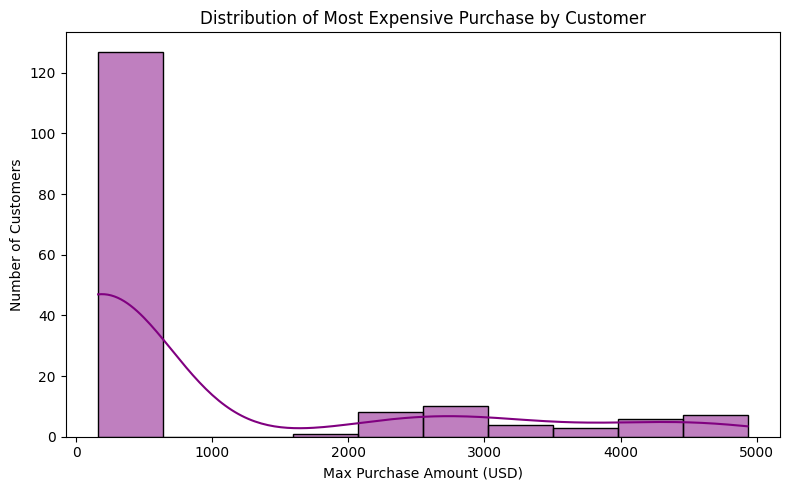

In [77]:
plt.figure(figsize=(8, 5))
sns.histplot(max_purchase_customer['max_purchase'], bins=10, kde=True, color='purple')
plt.title('Distribution of Most Expensive Purchase by Customer')
plt.xlabel('Max Purchase Amount (USD)')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

In [81]:
#Customer Retention Analysis

In [82]:
query = """
SELECT customer_reference_id, COUNT(*) AS purchase_count
FROM purchases
GROUP BY customer_reference_id
HAVING purchase_count > 1
"""

# Fetch results into a DataFrame
repeat_customers = pd.read_sql(query, conn)
print(repeat_customers)

     customer_reference_id  purchase_count
0                     3957              14
1                     3958              20
2                     3959              22
3                     3960              18
4                     3961              22
..                     ...             ...
161                   4118              22
162                   4119              16
163                   4120              19
164                   4121              18
165                   4122              32

[166 rows x 2 columns]


/var/folders/47/52n8nvf136x7f4rtd97135vh0000gn/T/ipykernel_18305/3869532933.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=repeat_customers, x='purchase_count', palette='Blues')


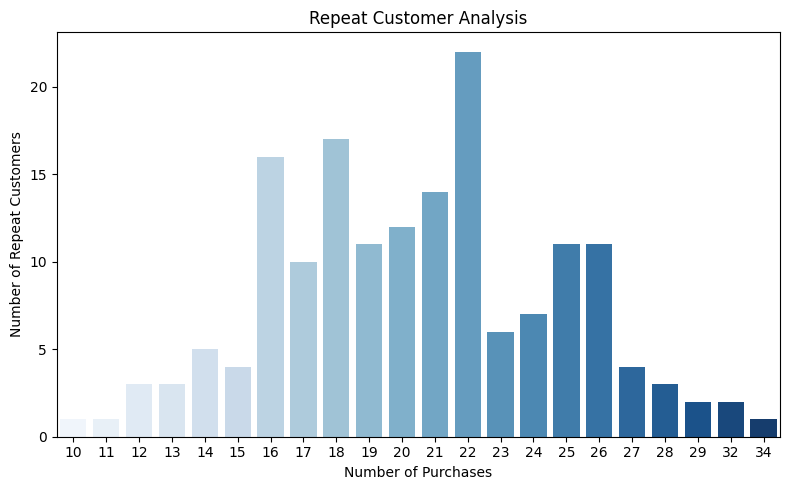

In [83]:
plt.figure(figsize=(8, 5))
sns.countplot(data=repeat_customers, x='purchase_count', palette='Blues')
plt.title('Repeat Customer Analysis')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Repeat Customers')
plt.tight_layout()
plt.show()